# DSE 200 FINAL PROJECT
## Fall 2022
### Due Date:  December 2nd, 2022

1. **Dataset name** : Amazon Books Reviews<br>
2. **Files** : Books_rating.csv , books_data.csv<br>
3. **Dataset Source** (Public Domain) : https://www.kaggle.com/code/mohamedbakhet/eda-for-amazon-books-reviews/data<br>
4. **Download links :**<br>
 > *Final project notebook* :  https://drive.google.com/file/d/1vh3ooZpubx-rjxBD8HcmoWs4JaBL5FNV/view?usp=share_link<br>
 > *Google Colab notebook* : /content/drive/MyDrive/Colab Notebooks/Zufeshan_Final Project_Fall2022.ipynb<br>
 > *Input files :*<br> https://drive.google.com/file/d/1dvFO6C0Izm8pVAE_UzeaolTlU8VLu6Zk/view?usp=share_link <br>https://drive.google.com/file/d/1xBCPSSLCsVabCjBZCNd5YMCXCT_tUwAw/view?usp=share_link <br>https://drive.google.com/file/d/1aIYgh7Yj-mWVV6ekhmfucwc6fUhlOTFM/view?usp=share_link <br>
5. **Project Author :** Zufeshan Imran
<br> Project made in Google Collab . Drive needs to be mounted to google notebook location under contents for accessing the datasets

## Table of Contents

# PART I: 20%


>>[Table of Contents](#scrollTo=PtnQqn3UIOLn)

>[PART I: 20%](#scrollTo=RaQbeBtZai91)

>>>[Preliminaries](#scrollTo=jf63sL3sai91)

>>>[1.1 Preliminaries](#scrollTo=KIBkPoHtai94)

>>>[1.2  Transformations](#scrollTo=UfVH1DJEai97)

>>>[1.3 Summary Statistics](#scrollTo=dtF_32Fdai99)

>[PART II : 80%](#scrollTo=nIeSn-kvai-C)

>>[Step 1: Find a dataset or datasets](#scrollTo=VaZt9tOAai-C)

>>>>[1.1. import useful libraries](#scrollTo=V8FJwU9dai-C)

>>>>[1.2. load csv files into dataframes](#scrollTo=Nu407IbQai-D)

>>[Step 2: Explore the datasets](#scrollTo=KuZpD_2fai-E)

>>>>[2.1. check shape,columns and missing values](#scrollTo=J5KB0OcTai-F)

>>>[2.2. cleanup noisy,unwanted and missing features](#scrollTo=NaYRzfQhai-H)

>>>>[2.2.1 df_book_data cleanup](#scrollTo=3P4X_1E3i58w)

>>>>[2.2.2 df_rating cleanup](#scrollTo=lPTlI0gFai-X)

>>>[2.3. Merge the dataframes into a single dataframe :  df_book_reviews](#scrollTo=E9ekjkJiai-a)

>>>>[2.3.1. check shape](#scrollTo=g5vbh7Epai-a)

>>>>[2.3.2. remove duplicates if any](#scrollTo=_7-w6YFIai-b)

>>>>[2.3.3. Visualization of NaN distribution](#scrollTo=9Gma91suai-b)

>>>[2.4. Visualizations of trends & patterns using matplotlib and seaborn libraries](#scrollTo=_oBxRN6Oai-b)

>>>>[2.4.1. Distribution of numeric features using Histogram across subplots](#scrollTo=XCxC8Xg0ai-c)

>>>>[2.4.2. Distribution of review scores using Pie Charts](#scrollTo=tqedooAsai-c)

>>>>[2.4.3. Distribution of review comments/texts using a Time Series trend analysis](#scrollTo=w0rpbDquai-d)

>>[Step 3:  Identify 1-3 research questions and perform analysis](#scrollTo=IvpUe3slai-d)

>>>>[3.1.Find Top 10 books - Dual axis graph of ratingsCount vs no.of different users reviewing vs length of description](#scrollTo=565o6sMDk4QO)

>>>>[3.2. Perform correlation Analysis between ratingsCount,length of description,reviews_helpful,total reviews,review/length and review/score](#scrollTo=LXVPLfmaai-e)

>>>>[3.3. Lineplot to visualize review score & length of description for least scored categories of books](#scrollTo=86LRGIvyai-e)

>>>>[3.4. Perform Regression analysis between different features and find MSE and Regression Coefficient](#scrollTo=pJ6Ed3CXai-f)

>>>>[3.5. Perform sentiment analysis on review/summary to determine review/score](#scrollTo=QRcxXRp7ai-i)

>>[Step 4:  Present your findings](#scrollTo=OGvgX9xbai-k)

>>>>[4.1. Brief summary about data](#scrollTo=54XbTiHz10oy)

>>>>[4.2. Assumptions Made Vs Actual Results](#scrollTo=6AjVid5n7c2h)

>>>>[4.3. Result of Linear Regression on data](#scrollTo=n5R0JFtU99ab)

>>>>[4.4. Findings from Sentiment Analysis using HuggingFace transformer module](#scrollTo=wkwxkQMoA__d)

>>>>[4.5. Limitations](#scrollTo=4sC195vkEFyS)



### Preliminaries

In [ ]:
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1.1 Preliminaries

Use numpy to load `prostate_cancer.npy` into a numpy matrix. Print the dataset's shape and the first 5 rows.<br>

**Output required**: 
<ul>
    <li>Tuple representing dataset's shape</li>
    <li>Matrix representing the first 5 rows</li>
</ul>

In [ ]:
# For reference
column_names = ['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
                'smoothness', 'compactness', 'symmetry', 'fractal_dimension']
diagnosis_encoding = {'Benign': 0, 'Malignant': 1}

In [ ]:
# Load data
data = np.load('/content/drive/MyDrive/Colab Notebooks/prostate_cancer.npy', allow_pickle=True)

# Your code here
print(data.shape)
print('\nFirst 5 rows: \n')
print(data[:5])

(100, 10)

First 5 rows: 

[[1 'M' 23 12 151 954 0.143 0.278 0.242 0.079]
 [2 'B' 9 13 133 1326 0.143 0.079 0.181 0.057]
 [3 'M' 21 27 130 1203 0.125 0.16 0.207 0.06]
 [4 'M' 14 16 78 386 0.07 0.284 0.26 0.097]
 [5 'M' 9 19 135 1297 0.141 0.133 0.181 0.059]]


### 1.2  Transformations

* The first column is the id of the patient, which isn't relevant for our purposes. Remove that column from the matrix by creating a new matrix composed of the rest of the columns.
* The second column is the `diagnosis_result` i.e. **M** for malignant and **B** for benign. Replace **M** with `1` and **B** with `0`
* Convert the `dtype` of the resulting array to `np.float64`
* As usual, print the shape of the resulting dataset and the first 5 rows.

**Output required**: 
<ul>
    <li>Tuple representing dataset's shape</li>
    <li>Matrix representing the first 5 rows</li>
</ul>

In [ ]:
#remove id
res = data[:,1:]

In [ ]:
#replace M with 1 and B with 0 in first column of resultant matrix
res[:,0] = np.where(res[:,0]=='M',1,0)

In [ ]:
#convert dtype to np.float64
print(res.dtype)
res = res.astype(np.float64)
print(res.dtype)

object
float64


In [ ]:
#print shape and first 5 rows
print('Shape:')
print(res.shape)
print('\nFirst 5 rows: \n')
print(res[0:5])

Shape:
(100, 9)

First 5 rows: 

[[1.000e+00 2.300e+01 1.200e+01 1.510e+02 9.540e+02 1.430e-01 2.780e-01
  2.420e-01 7.900e-02]
 [0.000e+00 9.000e+00 1.300e+01 1.330e+02 1.326e+03 1.430e-01 7.900e-02
  1.810e-01 5.700e-02]
 [1.000e+00 2.100e+01 2.700e+01 1.300e+02 1.203e+03 1.250e-01 1.600e-01
  2.070e-01 6.000e-02]
 [1.000e+00 1.400e+01 1.600e+01 7.800e+01 3.860e+02 7.000e-02 2.840e-01
  2.600e-01 9.700e-02]
 [1.000e+00 9.000e+00 1.900e+01 1.350e+02 1.297e+03 1.410e-01 1.330e-01
  1.810e-01 5.900e-02]]


### 1.3 Summary Statistics

**a)** Print the means and standard deviations of each column

**Output required**: 
<ul>
    <li>Floats representing the mean of each column</li>
    <li>Floats representing the standard deviation of each column</li>
</ul>

In [ ]:
mean_per_col = res.mean(axis=0)
mean_per_col

array([6.2000e-01, 1.6850e+01, 1.8230e+01, 9.6780e+01, 7.0288e+02,
       1.0273e-01, 1.2670e-01, 1.9317e-01, 6.4690e-02])

In [ ]:
std_per_col = res.std(axis=0)
std_per_col

array([4.85386444e-01, 4.85463696e+00, 5.16692365e+00, 2.35574107e+01,
       3.18108324e+02, 1.45683596e-02, 6.08370775e-02, 3.06307215e-02,
       8.11011097e-03])

**b)** Print the minimum and maximum values of each column

**Output required**: 
<ul>
    <li>Floats representing the minimum value found in each column</li>
    <li>Floats representing the maximum value found in each column</li>
</ul>

In [ ]:
min_per_col = res.min(axis=0)
min_per_col

array([0.00e+00, 9.00e+00, 1.10e+01, 5.20e+01, 2.02e+02, 7.00e-02,
       3.80e-02, 1.35e-01, 5.30e-02])

In [ ]:
max_per_col = res.max(axis=0)
max_per_col

array([1.000e+00, 2.500e+01, 2.700e+01, 1.720e+02, 1.878e+03, 1.430e-01,
       3.450e-01, 3.040e-01, 9.700e-02])

**c)** Calculate the `diagnosis_result`-wise means and standard deviations.<br>
**Report these values with respect to the actual *name* of the result, for which you must refer to 1.1**

**Output required**: 
<ul>
    <li>For each of the 2 results in the dataset:<ul>
        <li>Floats representing the standard deviation of each column for this result</li>
        <li>Floats representing the mean of each column for this result</li>
</ul>

In [ ]:
mean_M = res[res[:,0]==1.0].mean(axis=0)
mean_B = res[res[:,0]==0.0].mean(axis=0)
std_M = res[res[:,0]==1.0].std(axis=0)
std_B = res[res[:,0]==0.0].std(axis=0)

In [ ]:
print('diagnosis result : M\t Mean\t\t\tSTD\n')
for i in range(1,9):
    print(column_names[i+1]+'\t\t'+str(mean_M[i])+'\t\t'+str(std_M[i]))
print('\n')
print('diagnosis result : B\t Mean\t\t\tSTD\n')
for i in range(1,9):
    print(column_names[i+1]+'\t\t'+str(mean_B[i])+'\t\t'+str(std_B[i]))

diagnosis result : M	 Mean			STD

radius		16.177419354838708		4.640370513392318
texture		18.516129032258064		5.176690733576095
perimeter		107.98387096774194		19.5559511076625
area		842.9516129032259		287.754623707666
smoothness		0.10498387096774195		0.013826682870781305
compactness		0.1510967741935484		0.05768790046935246
symmetry		0.19875806451612907		0.02991745929131434
fractal_dimension		0.06474193548387099		0.008347175461758671


diagnosis result : B	 Mean			STD

radius		17.94736842105263		4.994456761045203
texture		17.763157894736842		5.116712608935318
perimeter		78.5		17.24704398776177
area		474.3421052631579		216.69494399607618
smoothness		0.09905263157894735		0.014992888434224678
compactness		0.08689473684210526		0.04188756219972716
symmetry		0.18405263157894733		0.02957412397458741
fractal_dimension		0.06460526315789474		0.007706932879195987


# PART II : 80%

This project is culmination of all you’ve learned in this course! You should expect to spend <b>24-32 total hours</b> on the project. Be sure to read all of the items below before starting.

There are a number of steps outlined below, but is critical that you do not view this as an entirely linear process.  Remember that the science component in data science is the creation of a hypothesis based on exploration and testing of that hypothesis through analysis.  You may need to go through many of these steps multiple times before you arrive at meaningful hypothesis or conclusions.

## Step 1: Find a dataset or datasets
>Amazon Books Reviews has 2 datasets - <b>books_rating.csv , books_data.csv</b><br>
>Data collected from : Kaggle(Public Domain) https://www.kaggle.com/code/mohamedbakhet/eda-for-amazon-books-reviews/data<br>
>Datasets contain feedback about 3M user on 212404 unique books the data set is part of the Amazon review Dataset it contains product reviews and metadata from Amazon, including 142.8     million reviews spanning May 1996 - July 2014.<br>
>They will be merged together using inner join method on the common column - <b>Title</b>


 #### 1.1. import useful libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error,r2_score
import re
import missingno as msno

#### 1.2. load csv files into dataframes

In [3]:
#reading csv data into two separate dataframes..
df_book_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/books_data.csv')
df_rating = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Books_rating.csv')

In [4]:
df_book_data.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,1/1/2005,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,3/1/2003,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [5]:
df_rating.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


## Step 2: Explore the datasets

In this step, you should explore what is present in the data and how the data is organized. You’ll need to determine what common features allow you to merge the datasets.  

You are expected to answer the following questions using the _pandas_ library and markdown cells to describe your actions:

* Are there quality issues in the dataset (noisy, missing data, etc.)? 
* What will you need to do to clean and/or transform the raw data for analysis?

You are also expected to use the _matplotlib_ library to visually explore the datasets and explain your findings, specifically,

* How are the data distributed? 
* What are some common trends?
* What are the relationships between variables in your datasets?

#### 2.1. check shape,columns and missing values

In [ ]:
# There are 10 features in both of the datasets and more than 2M records of books
df_book_data.shape, df_rating.shape

((212404, 10), (3000000, 10))

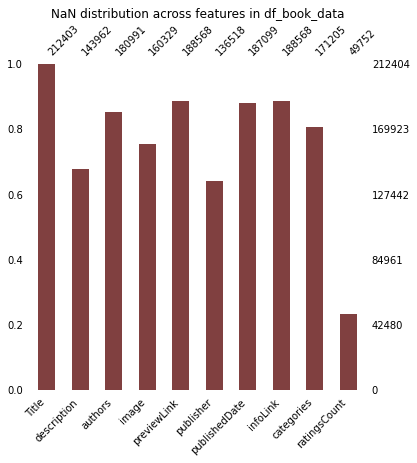

In [ ]:
# Visualizing the distribution of NaN values in df_book_data across different features
msno.bar(df_book_data,color=(0.5,0.25,0.25),figsize=(6,6),fontsize=10)
plt.title('NaN distribution across features in df_book_data')
plt.show()

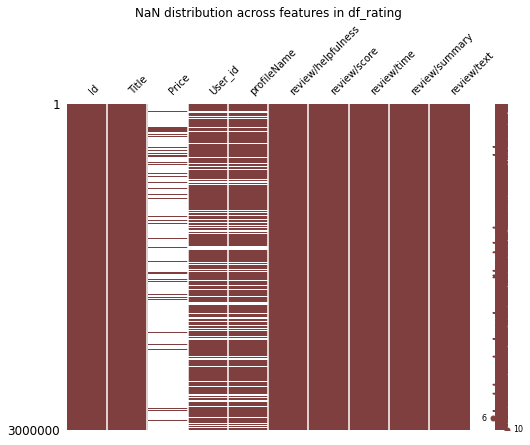

In [ ]:
# Visualizing the distribution of NaN values in df_rating across different features
msno.matrix(df_rating,figsize=(8,6),fontsize=10,color=(0.5,0.25,0.25))
plt.title('NaN distribution across features in df_rating')
plt.show()

### 2.2. cleanup noisy,unwanted and missing features


There are a no. of quality issues in both datasets for eg.


1.   Multiple records missing
2.   Inconsistent date format
3. String texts with whitespaces
4. Duplicate records
5. Some book titles are in mixed cases across different records (add to duplicacy) eg. Dr.Seuss and Dr.suess
6. Dtypes of features not clearly defined (convert to numeric,datetime)
7. Some features need to be split up into multiple meaningful features to enable analysis



#### 2.2.1 df_book_data cleanup

> 1. remove features - image,previewLink,infoLink

In [6]:
del df_book_data['image']
del df_book_data['previewLink']
del df_book_data['infoLink']

> 2. fill NaN with zero in ratingsCount

In [7]:
df_book_data['ratingsCount'].fillna(0,inplace=True)

>3. drop rows with NaN categories: total 41198 such values

In [8]:
df_book_data.dropna(subset = ['categories'],inplace=True) #drop rows only if categories is null

In [9]:
len(df_book_data) #171205 rows with no nulls in categories

171205

> 4. retrieve year from publishedDate - inconsistent date format

In [10]:
df_book_data['publishedDate'] = np.where(df_book_data['publishedDate'].str.contains('/'),df_book_data['publishedDate'].str[-4:],df_book_data['publishedDate'].str[0:4])

> 5. add new column - desp/length which calculates no.of words used to describe a book

In [11]:
df_book_data['desp/length'] = df_book_data['description'].str.count(' ')

> 6. change Title to lowercase as there are duplicate titles with different cases - lower,mixed,upper

In [12]:
#converting Title to lowercase so that no mismatch occurs while merging
df_book_data['Title'] = df_book_data['Title'].str.lower().str.strip()

> 7. remove duplicates if any

In [13]:
len(df_book_data[df_book_data.duplicated()]) #1702 duplicate values

1702

In [14]:
df_book_data.drop_duplicates(keep='first',inplace=True)
df_book_data.shape

(169503, 8)

In [15]:
df_book_data.tail()

,Title,description,authors,publisher,publishedDate,categories,ratingsCount,desp/length
212397,the magic of the soul: applying spiritual powe...,"""The Magic of the Soul, Applying Spiritual Pow...",['Patrick J. Harbula'],NaN,2002,"['Body, Mind & Spirit']",0.0,178.0
212398,autodesk inventor 10 essentials plus,Autodesk Inventor 2017 Essentials Plus provide...,"['Daniel Banach', 'Travis Jones']",SDC Publications,2016,['Computers'],0.0,243.0
212399,the orphan of ellis island (time travel advent...,"During a school trip to Ellis Island, Dominick...",['Elvira Woodruff'],Scholastic Paperbacks,2000,['Juvenile Fiction'],2.0,26.0
212400,red boots for christmas,Everyone in the village of Friedensdorf is hap...,NaN,NaN,1995,['Juvenile Fiction'],0.0,32.0
212402,the autograph man,Alex-Li Tandem sells autographs. His business ...,['Zadie Smith'],Vintage,2003,['Fiction'],19.0,121.0


#### 2.2.2 df_rating cleanup

> 1. Remove price as a feature as it has too many nulls

In [16]:
del df_rating['Price']

> 2. remove rows with NaN Title : total 208 such rows

In [17]:
df_rating.dropna(subset=['Title'],inplace=True)
len(df_rating)

2999792

> 3. remove rows with NaN User_id : total 561774 such rows

In [18]:
df_rating.dropna(subset=['User_id'],inplace=True)
len(df_rating)

2438018

> 4. add columns - total reviews , reviews_helpful by breaking down review/helpfulness into 2 parts

In [19]:
rvw = df_rating['review/helpfulness'].str.split('/')
df_rating['reviews_helpful'] = rvw.str[0]
df_rating['total reviews'] = rvw.str[1]

In [20]:
del df_rating['review/helpfulness']

> 5. add column - review/length which counts no. of words in review/text

In [21]:
df_rating['review/length'] = df_rating['review/text'].str.count(' ')

> 6. transform review/time into a valid datetime

In [22]:
df_rating['review/time'] = pd.to_datetime(df_rating['review/time'],unit='s')

> 7. change Title to lowercase as there are duplicate titles with different cases - lower,mixed,upper

In [23]:
#converting Title to lowercase so that no mismatch occurs while merging
df_rating['Title'] = df_rating['Title'].str.lower().str.strip()

> 7. remove duplicates if any

In [24]:
len(df_rating[df_rating.duplicated()]) #5546 duplicate records

5546

In [25]:
df_rating.drop_duplicates(keep='first',inplace=True)
df_rating.shape

(2432472, 11)

In [26]:
df_rating.tail()

,Id,Title,User_id,profileName,review/score,review/time,review/summary,review/text,reviews_helpful,total reviews,review/length
2999990,B000NSLVCU,the idea of history,AI1QNMVF2E3TN,"Robin George ""Master of Arts""",5.0,2003-07-01,R. G. Collingwood's Most Famous Book,Highly Recommended.This book is one of the bes...,28,29,262.0
2999994,B000NSLVCU,the idea of history,AOFGOUMXLMVZS,"S. Grotzke ""scquest""",4.0,2012-07-17,Thoughtful Critic of History,History is not a scientific process of cutting...,3,3,2061.0
2999996,B000NSLVCU,the idea of history,A1SMUB9ASL5L9Y,jafrank,4.0,2012-03-14,Quite good and ahead of its time occasionally,This is pretty interesting. Collingwood seems ...,1,1,102.0
2999997,B000NSLVCU,the idea of history,A2AQMEKZKK5EE4,"L. L. Poulos ""Muslim Mom""",4.0,2007-05-27,Easier reads of those not well versed in histo...,"This is a good book but very esoteric. ""What i...",0,0,27.0
2999998,B000NSLVCU,the idea of history,A18SQGYBKS852K,"Julia A. Klein ""knitting rat""",5.0,2006-11-09,"Yes, it is cheaper than the University Bookstore","My daughter, a freshman at Indiana University,...",1,11,46.0


### 2.3. Merge the dataframes into a single dataframe :  df_book_reviews

#### 2.3.1. check shape

In [27]:
df_book_reviews = df_book_data.merge(df_rating,how='inner',on='Title')
df_book_reviews.shape

(2048589, 18)

#### 2.3.2. remove duplicates if any

In [66]:
len(df_book_reviews[df_book_reviews.duplicated()])

0

In [67]:
df_book_reviews.drop_duplicates(keep='first',inplace=True)
df_book_reviews.shape

(2048589, 18)

#### 2.3.3. Visualization of NaN distribution

In [68]:
pd.isna(df_book_reviews).sum()

Title                   0
description        172671
authors             34349
publisher          259924
publishedDate        2544
categories              0
ratingsCount            0
desp/length             0
Id                      0
User_id                 0
profileName            90
review/score            0
review/time             0
review/summary         26
review/text             1
reviews_helpful         0
total reviews           0
review/length           1
dtype: int64

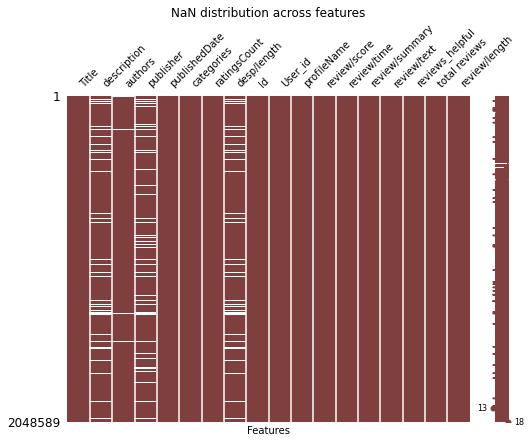

In [ ]:
msno.matrix(df_book_reviews,figsize=(8,6),fontsize=10,color=(0.5,0.25,0.25))
plt.title('NaN distribution across features')
plt.xlabel('Features')
plt.show()

### 2.4. Visualizations of trends & patterns using matplotlib and seaborn libraries

#### 2.4.1. Distribution of numeric features using <b>Histogram</b> across subplots

In [69]:
#converting some columns into numeric datatype
df_book_reviews['reviews_helpful'] = pd.to_numeric(df_book_reviews['reviews_helpful'])
df_book_reviews['total reviews'] = pd.to_numeric(df_book_reviews['total reviews'])

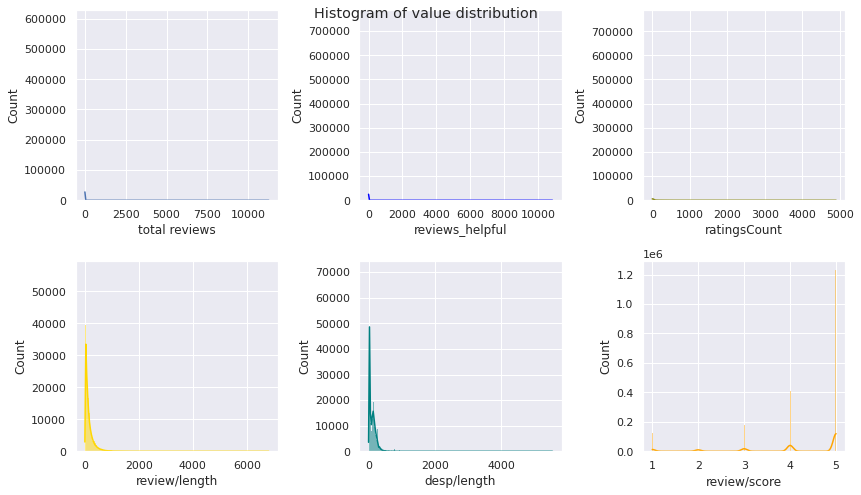

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 3, figsize=(12, 7))
plt.suptitle('Histogram of value distribution')
sns.histplot(data=df_book_reviews, x="total reviews", kde=True, color="C0", ax=axs[0, 0])
sns.histplot(data=df_book_reviews, x="reviews_helpful", kde=True, color="blue", ax=axs[0, 1])
sns.histplot(data=df_book_reviews, x="ratingsCount", kde=True, color="olive", ax=axs[0, 2])
sns.histplot(data=df_book_reviews, x="review/length", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df_book_reviews, x="desp/length", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df_book_reviews, x="review/score", kde=True, color="orange", ax=axs[1, 2])

plt.tight_layout()
plt.show()

#### 2.4.2. Distribution of review scores using <b>Pie Charts</b>

In [92]:
rvw_top_book = df_book_reviews[df_book_reviews['Title']=='the alchemist']['review/score']
rvw_top_book.value_counts().sort_index()

2.0    1
3.0    4
4.0    1
5.0    7
Name: review/score, dtype: int64

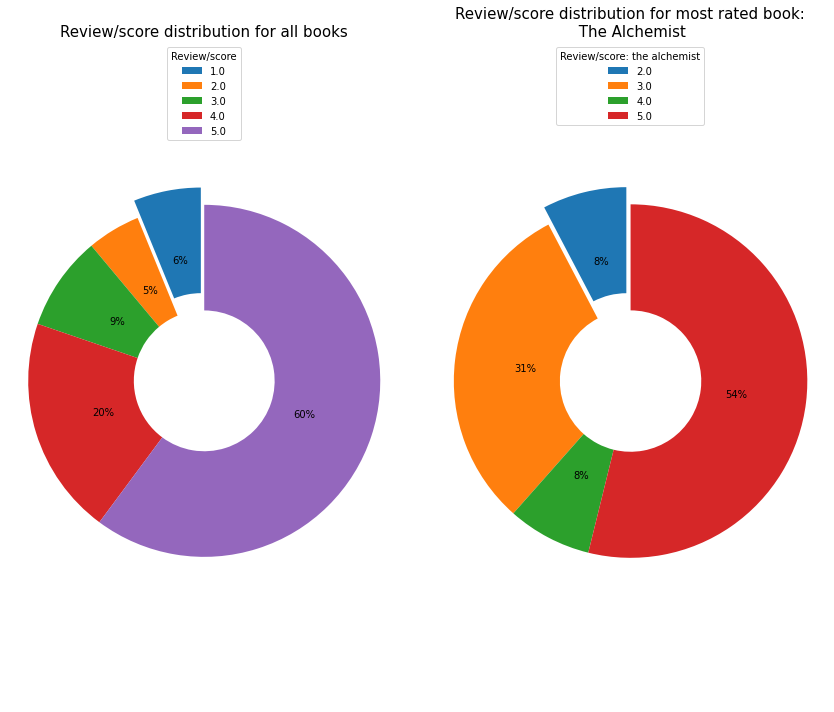

In [93]:
fig,axs=plt.subplots(1,2,figsize=(12,10))
label1 = np.sort(df_book_reviews['review/score'].unique())
label2 = [2.0,3.0,4.0,5.0]
size1 = df_book_reviews['review/score'].value_counts()/len(df_book_reviews['review/score'])*100
size2 = rvw_top_book.value_counts()/rvw_top_book.count()*100
axs[0].pie(size1.sort_index(),startangle=90,autopct='%1.0f%%',explode=(0.1,0,0,0,0),wedgeprops=dict(width=0.6))
axs[1].pie(size2.sort_index(),startangle=90,autopct='%1.0f%%',explode=(0.1,0,0,0),wedgeprops=dict(width=0.6))
axs[0].set_title('Review/score distribution for all books',fontsize=15)
axs[1].set_title('Review/score distribution for most rated book:\n The Alchemist',fontsize=15)
axs[0].legend(label1,title="Review/score",loc="upper center")
axs[1].legend(label2,title="Review/score: the alchemist",loc="upper center")

# Equal aspect ratio ensures that pie is drawn as a circle.
axs[0].axis('equal')
axs[1].axis('equal')
plt.tight_layout()
plt.show()


In [ ]:
# From these pie charts , we can visualize that almost 60% of the review/score for all books is a perfect score of 5.0 
# As assumed , for the book with highest no. of ratings, majority score is 5.0
# This leaves us with a consensus that >50% of the books have a good average review/score of 4.0-5.0 

#### 2.4.3. Distribution of review comments/texts using a <b>Time Series</b> trend analysis

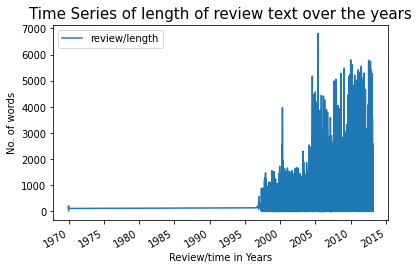

In [94]:
# Plot a time-series using review/time as index
df_book_series = df_book_reviews[['review/time','review/length']].set_index('review/time')

# creating plot
df_book_series.plot()
plt.title('Time Series of length of review text over the years',fontsize=15)
plt.xlabel('Review/time in Years')
plt.ylabel('No. of words')
plt.show()


In [ ]:
# A time series analysis of review length shows that users are writing lengthy reviews post 2010 . A descriptive review can help users 
# determine whether they want to buy the book or not.
# it also helps to decide on the review/score.

## Step 3:  Identify 1-3 research questions and perform analysis

Research questions :<br><b>1. What variables impact the review/score of a book?</b><br><b>2. Could we read the sentiments hidden in review summaries and map them with assigned review/scores?</b><br> If we can determine this , we could replace categories of books which have less scores with genres of books that users actually want to read and find appealing. This process will involve finding out strength of relationships between feautures, using visual graphs to analyze different relations and patterns and finally , performing a simple sentiment analysis of the review comments to check if they affect the review/score in any way

#### 3.1.Find Top 10 books - Dual axis graph of ratingsCount vs no.of different users reviewing vs length of description

In [70]:
books_by_ratings = df_book_reviews[['Title','ratingsCount','desp/length']].sort_values('ratingsCount',ascending=False)
books_by_ratings.drop_duplicates(keep='first',inplace=True)
books_by_ratings = books_by_ratings.head(10).sort_values('Title')
books_by_ratings

,Title,ratingsCount,desp/length
847106,a mission to millions; the story of ernie alle...,4572.0,477.0
1260829,a walk in the woods,4234.0,17.0
1400888,blue like jazz: nonreligious thoughts on chris...,4562.0,32.0
799287,eclipse,4392.0,185.0
494580,henrietta,4067.0,427.0
1393039,redeeming love,4249.0,238.0
403535,the alchemist,4895.0,219.0
1694674,the tipping point: how little things can make ...,4218.0,31.0
1670092,"travel light, eat heavy along the appalachian ...",4161.0,126.0
970654,unbroken,4572.0,477.0


In [71]:
books_by_users = df_book_reviews[['Title','User_id']].groupby('Title',as_index=False).count()
books_by_users = books_by_users[books_by_users['Title'].isin(books_by_ratings['Title'].head(10))]
books_by_users

,Title,User_id
4113,a mission to millions; the story of ernie alle...,1
5962,a walk in the woods,3
19199,blue like jazz: nonreligious thoughts on chris...,617
38759,eclipse,30
56012,henrietta,2
100337,redeeming love,1211
117902,the alchemist,13
146233,the tipping point: how little things can make ...,1295
152896,"travel light, eat heavy along the appalachian ...",4
154504,unbroken,3


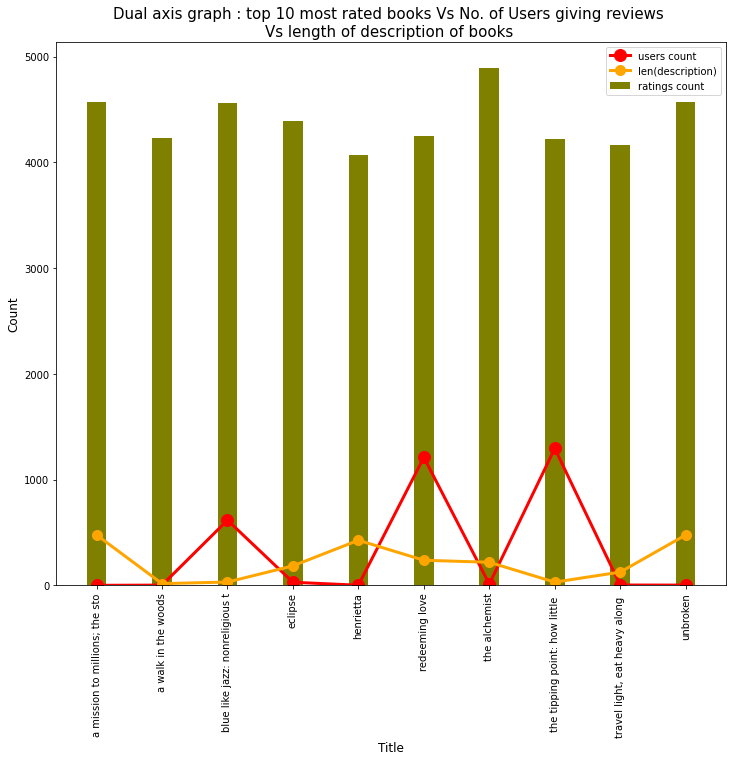

In [72]:
fig,ax=plt.subplots(figsize=(12,10))
ax.plot(books_by_ratings['Title'],books_by_users['User_id'],label='users count',color='red', marker='o', linewidth=3, markersize=12)
ax.bar(books_by_ratings['Title'],books_by_ratings['ratingsCount'],width=0.3,color='olive',label='ratings count')
ax.plot(books_by_ratings['Title'],books_by_ratings['desp/length'],label='len(description)',color='orange', marker='o', linewidth=3, markersize=10)

ax.set_title('Dual axis graph : top 10 most rated books Vs No. of Users giving reviews \nVs length of description of books ',fontsize=15)
ax.set_xlabel('Title',fontsize=12)
ax.set_ylabel('Count',fontsize=12)
ax.set_xticks(range(10))
ax.set_xticklabels(books_by_ratings['Title'].str[:30],rotation=90)
plt.legend()
plt.show()

In [63]:
# As is evident from the graph above, even the book with most no. of ratings 'The Alchemist' has very few users dedicatedly providing reviews
# and even the length of description for this book is approx 200 words. 
# No standard relation found between these features to conclude that one may be affecting the other....

#### 3.2. Perform correlation Analysis between ratingsCount,length of description,reviews_helpful,total reviews,review/length and review/score

In [73]:
# As a lot of values are missing , we will fill them with 0 for our analysis
df_book_reviews['desp/length'].fillna(0,inplace=True)

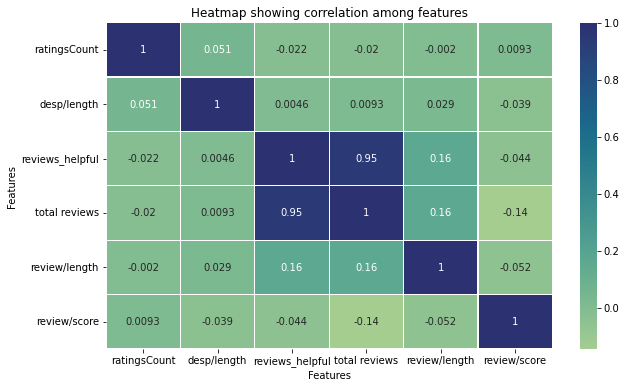

In [74]:
corr_data = df_book_reviews[['ratingsCount','desp/length','reviews_helpful','total reviews','review/length','review/score']].corr()
fig,ax=plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr_data,annot=True,linewidths=0.2,cmap='crest')
ax.set(xlabel='Features',ylabel='Features',title='Heatmap showing correlation among features')
plt.show()


In [ ]:
# strong positive correlation between total reviews and reviews_helpful indicates that more the no. of reviews , more reviews out of them could be counted as helpful
# average positive correlation between reviews_helpful and review/length indicates that more the length of review/text , more helpful users find the review
# average negative correlation between review/score and review/length indicates that more elaborate the review is , it is easier to provide score to it(even less scores count)

#### 3.3. Lineplot to visualize review score & length of description for least scored categories of books

In [95]:
# Search for top 20 categories/genres of books with lowest avg review/score of 1.0 . Try to check for trends in other variables and seek a relationship 
low_20_categories = df_book_reviews[['categories','review/score','reviews_helpful','review/length','desp/length']].groupby('categories',as_index=False).mean().sort_values('review/score',ascending=True).head(20)
low_20_categories

,categories,review/score,reviews_helpful,review/length,desp/length
4535,['Duty'],1.0,0.0,163.0,0.0
6588,['Indians of Mexico'],1.0,8.0,43.0,0.0
1021,['Architecture domestique'],1.0,3.0,89.0,0.0
9404,['Sami (European people)'],1.0,1.0,69.0,0.0
3586,['Consumers'],1.0,1.0,12.0,0.0
7465,['Manual training'],1.0,0.0,88.0,0.0
1308,['Atmospheric thermodynamics'],1.0,0.0,90.0,0.0
6833,['Ivory'],1.0,7.0,82.0,0.0
8462,"['Painting, Australian']",1.0,0.0,27.0,0.0
9407,['Samogitia'],1.0,2.0,216.0,0.0


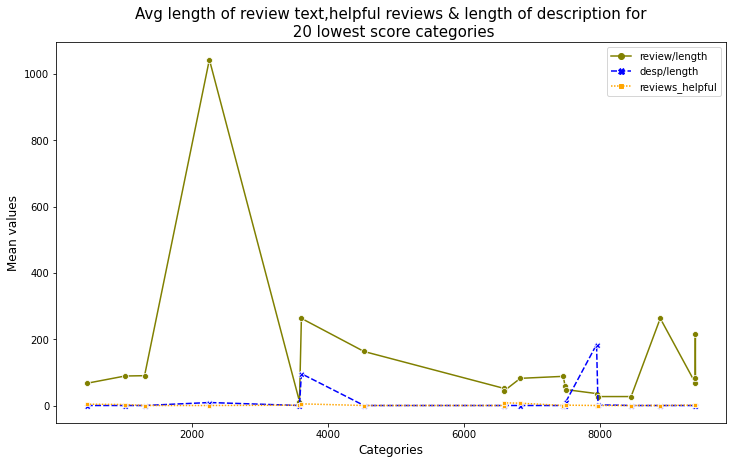

In [96]:
fig,ax=plt.subplots(figsize=(12,7))
ax.set_xlabel('Categories',fontsize=12)
ax.set_ylabel('Mean values',fontsize=12)
ax.set_title('Avg length of review text,helpful reviews & length of description for\n 20 lowest score categories',fontsize=15)
graph = sns.lineplot(data=low_20_categories[['review/length','desp/length','reviews_helpful']],markers=True,palette=['olive','blue','orange'])
plt.show()

In [ ]:
# As we can see from the above example, book categories with least avg review scores mostly have no description for the books which might be affecting their scores.

#### 3.4. Perform Regression analysis between different features and find MSE and Regression Coefficient

1. Select features and target and check for nulls

In [75]:
# 'reviews_helpful','total reviews' are dependent on each other, so we are using only one of them in LinearRegression 
# This is done according to the postulates of Linear Regression whereby features should be independent of one another
# If one feature affects the other , using them could depict a false picture of our target

features = ['ratingsCount','desp/length','reviews_helpful','review/length']
target = ['review/score']

In [76]:
x = df_book_reviews[features]
y = df_book_reviews[target]
x.isnull().sum() , y.isnull().sum()

(ratingsCount       0
 desp/length        0
 reviews_helpful    0
 review/length      1
 dtype: int64, review/score    0
 dtype: int64)

In [77]:
x = x.fillna(x['review/length'].mean())
#Fill  missing value in  review/length with mean review/length
# No more missing values in our data. So we can go ahead witho our analysis

2. Split data into train and test data using <b>75:25</b> ratio

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [79]:
x_train.shape , x_test.shape

((1536441, 4), (512148, 4))

3. Use LinearRegression for training a regression model

In [80]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

5. Check coefficients/intercept of the model

In [81]:
coefficients = (model.coef_).flatten()
intercept = model.intercept_
intercept

array([4.33220371])

In [82]:
# The coefficients of regression are not significant enough for analysis. This means features hardly impact the target - review/score

6. Predict the target for training data and compare Mean squared errors

In [83]:
y_train_pred = model.predict(x_train)

In [84]:
print(f'MSE train= {mean_squared_error(y_train_pred,y_train)}')
print(f'R2_score train= {r2_score(y_train,y_train_pred)}')

MSE train= 1.377790153810701
R2_score train= 0.005445244884905609


In [85]:
# we do not have a good R2 score. Our linear regression analysis shows that only 0.5% of the review/score of books out of around 2M is impacted by our selected features.

#### 3.5. Perform <b>sentiment analysis</b> on review/summary to determine review/score<br>
For NLP of review/text, we will be using <u>Hugging Face</u> pipeline and try to classify our review/text into Positive , Negative or Neutral reviews

In [28]:
# Installing the Libraries (tensorflow is required for huggingFace)
!pip install transformers -q

     |████████████████████████████████| 5.5 MB 27.7 MB/s 
     |████████████████████████████████| 7.6 MB 53.2 MB/s 
     |████████████████████████████████| 182 kB 86.6 MB/s 


In [29]:
# import useful library
from transformers import pipeline


In [30]:
# we will do Classification of the review/text and check their labels
#classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english",tokenizer="distilbert-base-uncased-finetuned-sst-2-english",truncation=True)

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [36]:
# we try to make a list of first 10000 review/summary and check the text classification for those summaries of reviews
summary_list = []
for rvw in df_book_reviews['review/summary'][:10000]:
  summary_list.append(rvw)

In [37]:
# Perform text classification on first 10000 review summaries and extract their label for further analysis
label = []
for rvw in summary_list:
  pred = classifier(rvw)
  label.append(pred[0]['label'])

In [42]:
# we try to make a list of last 10000 review/summary and check the text classification for those summaries of reviews
summary_list = []
for rvw in df_book_reviews['review/summary'][2038589:2048589]:
  summary_list.append(rvw)

In [43]:
# Perform text classification on last 10000 review summaries and extract their label for further analysis
label2 = []
for rvw in summary_list:
  pred = classifier(str(rvw))
  label2.append(pred[0]['label'])

In [31]:
# we try to make a list of mid 50000 review/summary and check the text classification for those summaries of reviews
summary_list = []
for rvw in df_book_reviews['review/summary'][10001:60000]:
  summary_list.append(rvw)

In [32]:
# Perform text classification on mid 50000 review summaries and extract their label for further analysis
label3 = []
for rvw in summary_list:
  pred = classifier(str(rvw))
  label3.append(pred[0]['label'])

## Step 4:  Present your findings

 #### 4.1. Brief summary about data
 
 

The Amazon Books review data is a huge dataset with more than 2M records of books and reviews given by different users. The raw data had many unwanted features , duplicates , inconsistencies (mixed cases of common column - Title) , un-encoded data in free text columns like review/summary and review/text , etc which were removed and entire dataset was brought into a clean organized dataframe -  **df_book_reviews** for further analysis. The data we are dealing with has ***more than 50% records with a perfect review score of 5.0*** .So our results might be skewed more towards positive reviews<br>

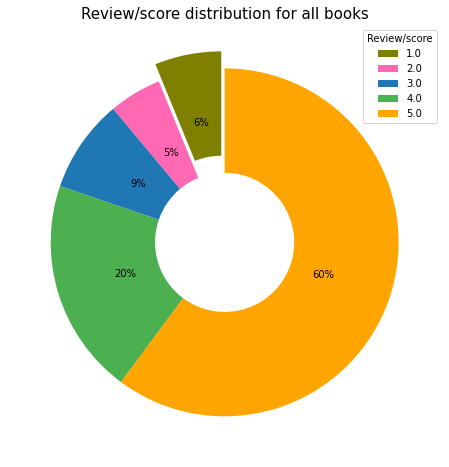

In [89]:
fig,ax = plt.subplots(figsize=(10,8))
size = df_book_reviews['review/score'].value_counts()/len(df_book_reviews['review/score'])*100
ax.pie(size.sort_index(),startangle=90,autopct='%1.0f%%',explode=(0.1,0,0,0,0),wedgeprops=dict(width=0.6),colors=["olive", "hotpink", "C0", "#4CAF50",'orange'])
ax.set_title('Review/score distribution for all books',fontsize=15)
ax.legend((1.0,2.0,3.0,4.0,5.0),title="Review/score",loc="upper right")
plt.show()

#### 4.2. Assumptions Made Vs Actual Results


Following assumptions to carry out analysis and answer the research questions :

a. Length of description provided for a book affects it's review score - **Partly True** as avg. negative correlation found <br>
b. Length of review passage affects the review score - **False**<br>
c. Total no. of reviews and no. of helpful reviews affect the review score -     **Partly True** as avg. negative correlation was found<br>

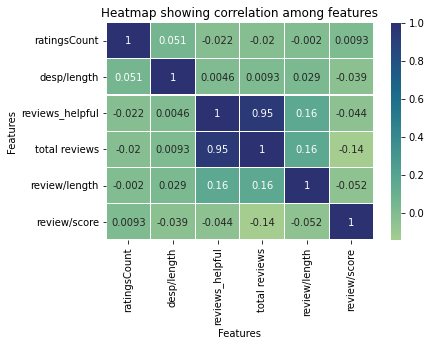

In [90]:
ax = sns.heatmap(corr_data,annot=True,linewidths=0.2,cmap='crest')
ax.set(xlabel='Features',ylabel='Features',title='Heatmap showing correlation among features')
plt.show()

d. Books with more ratings have more no. of users providing reviews - **False**<br>
e. Books with more ratings have lengthy and elaborate descriptions - **False** <br>
f. Book categories with low review scores must have small or very small length of description provided - **True** as most low score categories were found to have less than 100 words in description<br>

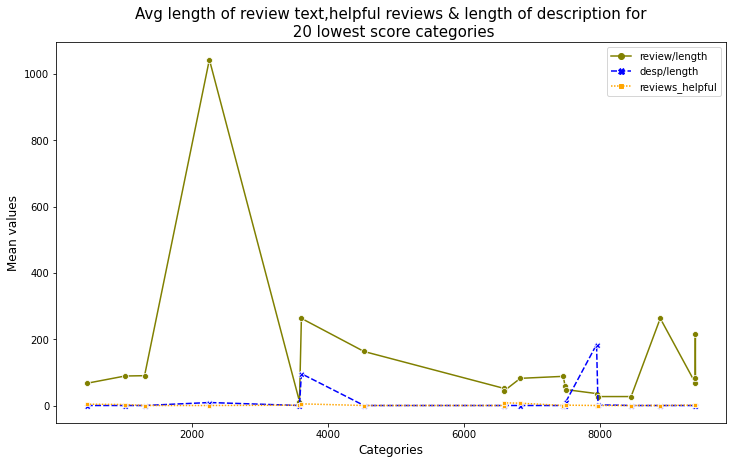

In [97]:
fig,ax=plt.subplots(figsize=(12,7))
ax.set_xlabel('Categories',fontsize=12)
ax.set_ylabel('Mean values',fontsize=12)
ax.set_title('Avg length of review text,helpful reviews & length of description for\n 20 lowest score categories',fontsize=15)
graph = sns.lineplot(data=low_20_categories[['review/length','desp/length','reviews_helpful']],markers=True,palette=['olive','blue','orange'])
plt.show()

#### 4.3. Result of Linear Regression on data
 

The coefficients of regression are not significant enough for analysis. This means features hardly impact the target - review/score

ratingsCount       0.000020
desp/length       -0.000447
reviews_helpful   -0.002212
review/length     -0.000306
dtype: float64


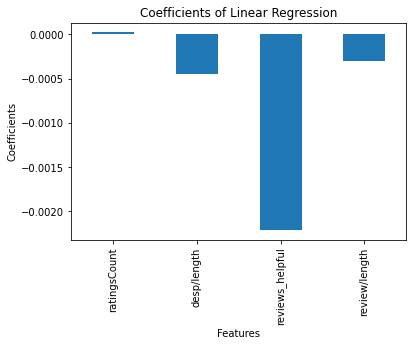

In [ ]:
# Plotting coefficients
s = pd.Series({feat:coef for feat, coef in zip(features, coefficients)})
print(s)
s.plot(kind='bar')
plt.title('Coefficients of Linear Regression')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()


Furthermore , R2_score of the training data (75% of total data) is very insignificant. It shows that only **0.5%** of the review/score of books out of around 2M is impacted by our selected features. Hence, we can't predict review/score based on our selected features and determine this key attribute<br>MSE train= 1.377790153810701<br>
R2_score train= 0.005445244884905609

In [ ]:
# Comparison between distributions
plt.hist(y_train, edgecolor='white', bins=50,  alpha=0.5, label='real');
plt.hist(y_train_pred, edgecolor='white', bins=50, color='orange', alpha=0.5, label='predicted');
plt.legend()
plt.title('Distribution between y_real and y_pred (TRAIN)')
plt.show()

#### 4.4. Findings from Sentiment Analysis using HuggingFace transformer module

A sample of **first 10K,mid 50K and last 10K** review summaries were taken to conduct a text classification on them and report sentiments hidden in the review summaries. <br> More than **75% of the records** with review score of 5.0 were mapped correctly to **POSITIVE** label. Also, around **80% of the review score 1.0** were mapped correctly to **NEGATIVE** label. <br> Some outliers were found where even a perfect score of 5.0 was marked as NEGATIVE and even 1.0 score was marked as positive. <br> Since majority of our records have 5.0 review/score , majority of the sentiment amongst reviews is POSITIVE. 
**Hence, it could be deduced that sentiment in the review/summary impacts the review score in a positive way.**<br><br>
<u>**NOTE**</u> : It takes around 9m for HuggingFace bert model to classify 10K items using 12.68GB RAM configuration<br>
> 10K -------- 9m<br>
> 70K -------- ~63m i.e more than 1 hr<br>
> **2M  -------- ~12.5 days**<br>
Hence, only samples of data were taken to conduct this analysis and not the entire 2M records as that would crash the session with memory run-out error!

In [38]:
# No. of positive and negative sentiments garnered through classification in the first 10000 records
pd.Series(label).value_counts()

POSITIVE    7477
NEGATIVE    2523
dtype: int64

In [44]:
# No. of positive and negative sentiments garnered through classification in the last 10000 records
pd.Series(label2).value_counts()

POSITIVE    7008
NEGATIVE    2992
dtype: int64

In [33]:
# No. of positive and negative sentiments garnered through classification in the mid 50000 records
pd.Series(label3).value_counts()

POSITIVE    38356
NEGATIVE    11643
dtype: int64

In [47]:
# create a small dataframe with first 10000 records of required features for analysis and add column 'label'
df_rvw = df_book_reviews[['Title','review/summary','review/score']][:10000]
df_rvw = df_rvw.assign(label=pd.Series(label))


In [48]:
# Append last 10000 records from df_book_reviews to this dataframe and assign deduced labels to review summaries
df_rvw = df_rvw.append(df_book_reviews[['Title','review/summary','review/score']][2038589:2048589])

In [49]:
# Append mid  50000 records from df_book_reviews to this dataframe and assign deduced labels to review summaries
df_rvw = df_rvw.append(df_book_reviews[['Title','review/summary','review/score']][10001:60000])

In [50]:
df_rvw.shape

(69999, 4)

In [ ]:
df_rvw['label'][10000:20000] = pd.Series(label2)


In [ ]:
df_rvw['label'][10001:60000] = pd.Series(label3)

In [56]:
#Count the no. of NEGATIVE REVIEWS and POSITIVE reviews and compare them with review/score for 70K record sample
df_counts = df_rvw.groupby(['label','review/score'],as_index=False).count()
df_counts

,label,review/score,Title,review/summary
0,NEGATIVE,1.0,1180,1180
1,NEGATIVE,2.0,1003,1003
2,NEGATIVE,3.0,1330,1330
3,NEGATIVE,4.0,2756,2756
4,NEGATIVE,5.0,7897,7897
5,POSITIVE,1.0,2404,2404
6,POSITIVE,2.0,2002,2002
7,POSITIVE,3.0,3852,3852
8,POSITIVE,4.0,9482,9482
9,POSITIVE,5.0,28093,28092


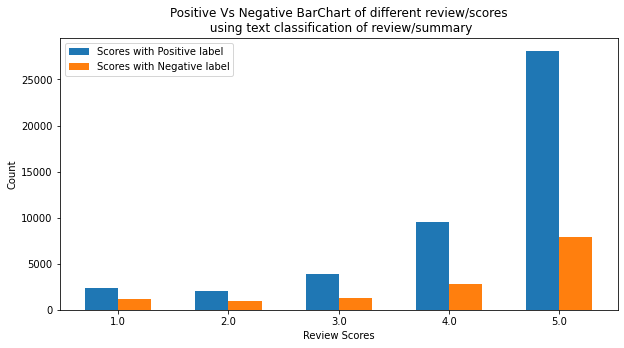

In [57]:
# Numbers of pairs of bars you want
N = 5

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = df_counts[df_counts['label']=='POSITIVE']['review/summary']
# Specify the values of orange bars (height)
orange_bar = df_counts[df_counts['label']=='NEGATIVE']['review/summary']
# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Scores with Positive label')
plt.bar(ind + width, orange_bar, width, label='Scores with Negative label')

plt.xlabel('Review Scores')
plt.ylabel('Count')
plt.title('Positive Vs Negative BarChart of different review/scores\n using text classification of review/summary')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, df_counts['review/score'].unique())

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

#### 4.5. Limitations

Some of the limitations of the data & chosen models are :<br>
1. Dataset is extremely large so it consumes more RAM and disk space. Hence, repeated calculations become quite cumbersome and slow<br>
2. This dataset has more than half of the review scores of 5.0 which limits our findings to only such records and not a good amount of a variety of other scores<br>
3. Numeric features do not strongly affect the review/score as per the  assumptions stated above<br>
4. Sentiment analysis gives a clear picture of the sentiment hidden in review summary but due to the size of the dataset , review passage could not be analyzed and classified which would have given a more solid interpretation<br>
5. Transformer module of HuggingFace relies on older versions of TensorFlow and Keras libraries. This led to switching to Google Collab for development of notebook with limited RAM and session restrictions
> *Due to limited RAM, memory crashes occured while trying to process 2M items for sentiment analysis. Hence, only random samples of around 70K items were taken*
6.  Model **distilbert-base-uncased-finetuned-sst-2-english ** has limitation on max length of tokens which is **512** . So any review with more than 512 words had to be further split up. 
7. This model does not accept input that is not a string. So different encodings have to be casted to class Str before passing into the pipeline.
